<a href="https://colab.research.google.com/github/JamesEdMichaud/cs480student/blob/main/01/Michaud_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

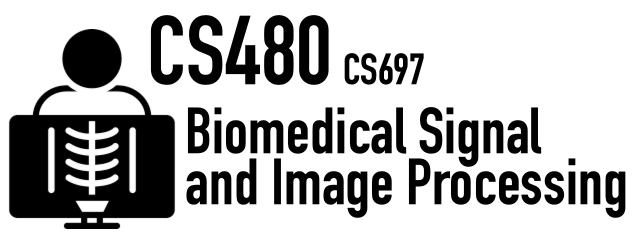
# Assignment 1


In [135]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [136]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram()                # let's load the scipy ECG dataset
SAMPLING_RATE = 360                      # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

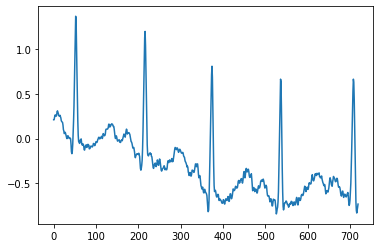

In [137]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
plt.plot(ecg[SAMPLING_RATE*9:SAMPLING_RATE*11]) # actually 10-12

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [138]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [139]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [140]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [141]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


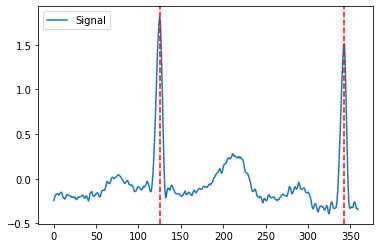

In [142]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

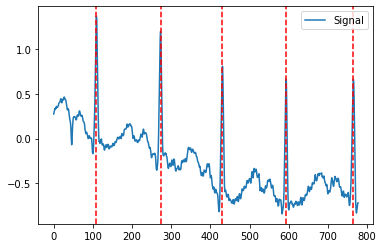

In [143]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

# I chose to use the 10-12 range, as you mentioned that was your original intention.
start = SAMPLING_RATE * 9  - 57 # Minimum needed for neurokit to detect the first peak
end   = SAMPLING_RATE * 11 + 1  # Only needed one extra sample to catch the last peak 
_, rpeaks2 = nk.ecg_peaks(ecg[start:end], sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks2['ECG_R_Peaks'], ecg[start:end])

**Task 3:** Detect Heartrate. [15 Points]

In [144]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

heart rate:  100.60000000000001


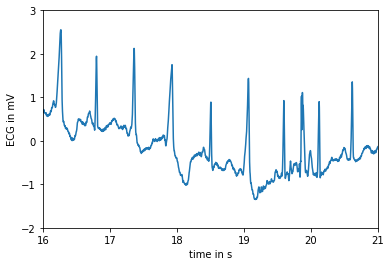

In [152]:
# Heart rate can be calculated by taking the number of R peaks and dividing by the
# duration. Multiply by 60 to convert from seconds to minutes
duration = (len(ecg) / SAMPLING_RATE)                    # 300 seconds
beats_per_second = len(rpeaks['ECG_R_Peaks']) / duration # 1.676 BPS
heartrate = beats_per_second * 60                        # 100.6 BPM
print("heart rate: ", heartrate)
# This patient seems to have a normal heart rate. It might be a bit elevated if
# resting, but nothing overly concerning. 

# Which one? This makes me think you mean regular heart BEAT (instead of rate)?
# If that's what you meant, this patient seems to have a normal heart beat. 
# This ECG data does not look too much like any of the abnormal ECG morphology 
# examples from the class slides.

# I've taken a closer look at the ecocardiogram() method and see that there is an
# irregular beat in this sample. If we plot starting from 16 seconds as mentioned
# in the documentation, we can see what appears to be ST-depresseion morphology,
# along with possibly some atrial flutter or fibrillation near the 20 second mark.
# import matplotlib.pyplot as plt
time = np.arange(ecg.size) / SAMPLING_RATE
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(16, 21)
plt.ylim(-2, 3)
plt.show()

**Task 4:** Detect P Q S T Peaks. [25 Points]

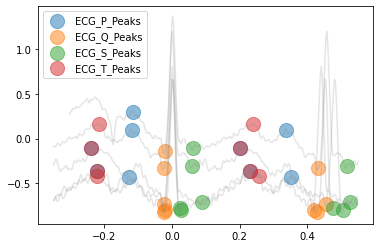

In [146]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg[start:end], rpeaks2, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [147]:
# TODO Does the detection work well?

# It seems to do a very good job (to my untrained eye) of detecting each peak,
# even though this ECG data is far less uniform than the example in the tutorial

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

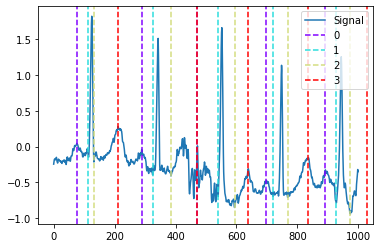

In [148]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

# Thank you for the clarification on this one!
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5],
                       waves_peak['ECG_T_Peaks'][:5]], ecg[:1000])

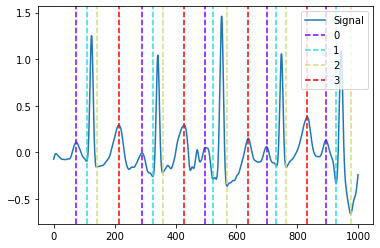

In [149]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

bandpassed = nk.signal_filter(ecg[:1000], sampling_rate=SAMPLING_RATE, lowcut=0.67, highcut=18)

_, bandpassed_peak = nk.ecg_delineate(bandpassed, rpeaks['ECG_R_Peaks'][:5], sampling_rate=SAMPLING_RATE, show_type='peaks')
plot = nk.events_plot([bandpassed_peak['ECG_P_Peaks'],
                       bandpassed_peak['ECG_Q_Peaks'],
                       bandpassed_peak['ECG_S_Peaks'],
                       bandpassed_peak['ECG_T_Peaks']], bandpassed)

# I was reading the information about filtering on https://www.medteq.net/article/2017/4/1/ecg-filters, which
# indicated that it's common to pass 0.67Hz-40Hz, but I found this wasn't as effective as narrowing the
# signal even more. 
# Surprisingly, an highcut of 18Hz seemed to make each wave more clean, and a 
# previously missing P-peak was detected (the 3rd one).
# A lowcut of 0.67 does work well! I found that increasing it to a number greater
# than 1 would sharpen each peak, but the shape wouldn't look right.

In [150]:
# TODO Does the filtering improve the result?

# I think it absolutely did. It made it both more readable as a human, and 
# caused missing peaks to be detected.

In [151]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#